<h1><center>MDI343 / MDI724 - TP1 Avazu<center></h1>

#### For any remark or suggestion, please feel free to contact us at: 
#### pascal.bianchi@telecom-paristech.fr
#### nidham.gazagnadou@telecom-paristech.fr
#### kevin.elgui@gmail.com



## First name : Maël
## Last name : FABIEN
## Email : mael.fabien@telecom-paristech.fr

<font color="red">**Question 0:**
    Import the needed packages: numpy, pandas etc..
</font>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

# The dataset

<font color="red">**Question 1:**
    Load the data into a pandas DataFrame and display the first lines with the ".head()" method.
    <br>
</font>
**Remark**: the features meaning is available at https://www.kaggle.com/c/avazu-ctr-prediction/data

In [62]:
!pwd

/home/ubuntu/notebooks


In [63]:
df = pd.read_csv('/home/ubuntu/data/train-1000000')

In [64]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3.983206e+18,0,14102915,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,2,4687,320,50,423,2,39,100148,32
1,7.756884e+18,0,14103007,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,0,17894,320,50,2039,2,39,100077,32
2,6.941774e+17,0,14102711,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,1,0,22684,320,50,2619,1,163,100055,71
3,2.664154e+18,1,14102903,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,0,23222,320,50,2676,0,35,100176,221
4,1.480510e+19,0,14102902,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,1,0,8330,320,50,761,3,175,100081,23


<font color="red">**Question 2:**
    What is the 'click' frequency in the dataset?
    <br>
</font>

In [65]:
np.mean(df['click'])

0.169971

The average click frequency is 17%.

We note that the Avazu dataset is very unbalanced. The 'click' class represents less than a fifth of the whole database. We already know that a classifier always predicting 'click'=0 will have good preformances in terms of error rate (around 0.17). The ROC and lift curves will be better performance metrics.

<font color="red">**Question 3:**
    What are the categorical features? Using the 'df.dtypes' method, compute the number of distincts values for each of these features.
</font>

In [66]:
df.dtypes

id                  float64
click                 int64
hour                  int64
C1                    int64
banner_pos            int64
site_id              object
site_domain          object
site_category        object
app_id               object
app_domain           object
app_category         object
device_id            object
device_ip            object
device_model         object
device_type           int64
device_conn_type      int64
C14                   int64
C15                   int64
C16                   int64
C17                   int64
C18                   int64
C19                   int64
C20                   int64
C21                   int64
dtype: object

The only non-categorical variables are the id, the device id and the device ip.

In [67]:
df.nunique()

id                  1000000
click                     2
hour                    240
C1                        7
banner_pos                7
site_id                2651
site_domain            2871
site_category            22
app_id                 3157
app_domain              198
app_category             26
device_id            150501
device_ip            555248
device_model           5168
device_type               5
device_conn_type          4
C14                    2243
C15                       8
C16                       9
C17                     420
C18                       4
C19                      66
C20                     163
C21                      60
dtype: int64

<font color="red">**Question 4:**
    If one does a dummy encoding of all categorical variables, what would be the dimension of the model?
    In other words: what would be the dimension of our big feature vector encoded with dummies. 
    <br>
</font>

The number of columns would be the sum of all unique values of columns appart from the id : 723080

In [68]:
df.nunique().sum() - df['id'].nunique()

723080

The total number of columns is given by the total number of unique column values minus the number of unique id's.

<font color="red">**Question 5:**
    Analyze the 'hour' column: which format is used? How can we transform/simply this feature?
</font>

In [69]:
print(df['hour'].head()) # Fill here
print(df['hour'].tail()) # Fill here

0    14102915
1    14103007
2    14102711
3    14102903
4    14102902
Name: hour, dtype: int64
999995    14102602
999996    14102101
999997    14102318
999998    14102908
999999    14102600
Name: hour, dtype: int64


In [70]:
df['hour'].describe()

count    1.000000e+06
mean     1.410256e+07
std      2.966148e+02
min      1.410210e+07
25%      1.410230e+07
50%      1.410260e+07
75%      1.410281e+07
max      1.410302e+07
Name: hour, dtype: float64

In [71]:
df['hour'].nunique()

240

The hour format corresponds to an integer format. There are only 240 unique values. We could transform it into humanly interpretable values. The 1410 seems to be in front of every value. The two first digits look like a year, and the 2 last look like a month. The 2 next numbers correspond apparently to the day, and the last two numbers to the hour.

<font color="red">**Question 6:**
    Run and understand the following script.
</font>

In [72]:
import datetime
def datesplit(originalDate):
    originalDate = str(originalDate)
    
    year = int("20" + originalDate[0:2])
    month = int(originalDate[2:4])
    day = int(originalDate[4:6])
    hour = int(originalDate[6:8])
    
    return datetime.datetime(year, month, day, hour)

# Exemple :
datesplit(14102915).weekday(), datesplit(14102915).hour

(2, 15)

This transforms the hour format of the column into several values : year, month, day and hour as described above.
The function weekday() returns the day of the week of a date in the format given above.

<font color="red">**Question 7:**
    Using the ".apply( ... )" method, create a 'weekday' for the day of the week. Then, replace the 'hour' column by the hour.
</font>

To answer this question you have to understand that applies takes a function as argument
<br>
"lambda x: ... " is used to create local unamed function of x
<br>
Check the documentation: https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions

In [73]:
df['weekday'] = df['hour'].apply(lambda x : datesplit(x).weekday()) # Fill here
df['hour'] = df['hour'].apply(lambda x : datesplit(x).hour) # Fill here

<font color="red">**Question 8:**
    Using the ".groupby( ... )" method, visualize the influence of the hour and of the day on the 'click' frequency. To do so, plot 'click' vs 'hour' and 'click' vs 'weekday' curves.
</font>

In [74]:
print(df.groupby(df['hour'])['click'].mean()) # Fill here for the influence of the hour
print(df.groupby(df['weekday'])['click'].mean()) # Fill here for the influence of the day

hour
0     0.182707
1     0.185734
2     0.175552
3     0.175367
4     0.159664
5     0.162126
6     0.169315
7     0.177490
8     0.163418
9     0.159042
10    0.162613
11    0.171025
12    0.171659
13    0.168032
14    0.178075
15    0.183737
16    0.180076
17    0.173271
18    0.164072
19    0.165725
20    0.158402
21    0.162384
22    0.166847
23    0.170733
Name: click, dtype: float64
weekday
0    0.183143
1    0.161577
2    0.158675
3    0.173795
4    0.173392
5    0.183995
6    0.183105
Name: click, dtype: float64


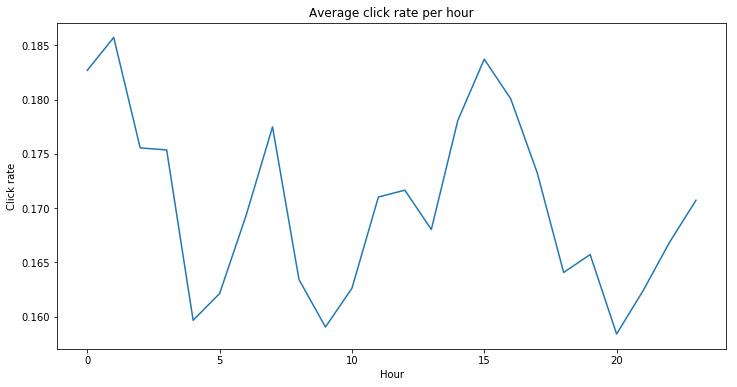

In [75]:
plt.figure(figsize=(12,6))
plt.plot(df.groupby(df['hour'])['click'].mean())
plt.xlabel("Hour")
plt.ylabel("Click rate")
plt.title("Average click rate per hour")
plt.show()
#Fill here for the influence of the hour

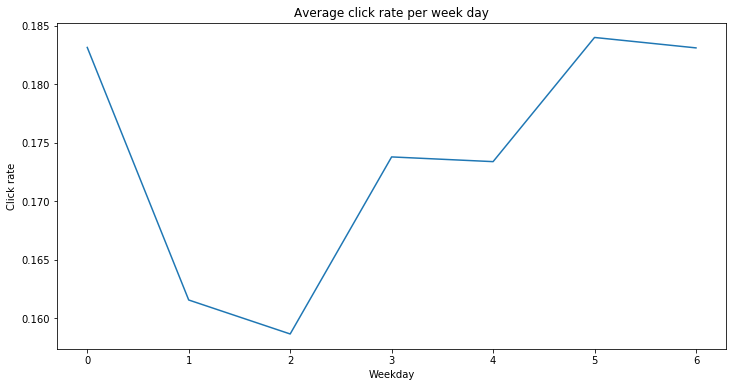

In [76]:
plt.figure(figsize=(12,6))
plt.plot(df.groupby(df['weekday'])['click'].mean())
plt.xlabel("Weekday")
plt.ylabel("Click rate")
plt.title("Average click rate per week day")
plt.show()
# Fill here for the influence of the day

<font color="red">**Question 9:**
    Explain what the axes stand for and try to interpret the shape of the obtained curves.
</font>

- The hours at which people click the most on ads is around 7 in the morning, around 3-4PM and finally around midnight.
- Ads also work best on Saturday and Sunday, which seems logic as people essentially have more time available at those times.

# Preliminary work and first model

Start by understanding the features with few modalities:
'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.

<font color="red">**Question 10:**
    For instance, inspect the columns 'C15' (dimension of the advert) and 'site_category': visualize the clicks mean.
</font>

In [77]:
df.groupby(df['C15'])['click'].mean() # Fill here: inspect 'C15' using '.groupby'

C15
120     0.033708
216     0.129612
300     0.360537
320     0.158767
480     0.285714
728     0.054144
768     0.375000
1024    0.166667
Name: click, dtype: float64

In [78]:
df.groupby(df['site_category'])['click'].mean() # Fill here: inspect 'site_category' using '.groupby'

site_category
0569f928    0.053613
28905ebd    0.208076
335d28a8    0.089824
3e814130    0.284245
42a36e14    0.225806
50e219e0    0.128597
5378d028    0.000000
70fb0e29    0.144737
72722551    0.059172
75fa27f6    0.111305
76b2941d    0.035756
8fd0aea4    0.015873
9ccfa2ea    0.000000
a818d37a    0.000000
bcf865d9    0.000000
c0dd3be3    0.128655
c706e647    0.000000
da34532e    0.000000
dedf689d    0.530449
e787de0e    0.000000
f028772b    0.179719
f66779e6    0.034564
Name: click, dtype: float64

The click rate varies a lot depending on the site category or on the C15 column category.

<font color="red">**Question 11:**
    Some site categories have a null click rate. Why? Display the 'count()' of each modality.
    <br><br>
    Hint: you can use the method ".value_counts()"
</font>

In [79]:
df['site_category'].value_counts() # Fill here

50e219e0    408921
f028772b    313339
28905ebd    182020
3e814130     75667
f66779e6      6365
75fa27f6      4007
335d28a8      3351
76b2941d      2573
c0dd3be3      1026
72722551       676
dedf689d       624
70fb0e29       608
0569f928       429
8fd0aea4       189
a818d37a        81
42a36e14        62
e787de0e        28
bcf865d9        16
5378d028        11
9ccfa2ea         5
da34532e         1
c706e647         1
Name: site_category, dtype: int64

There is really few examples in each site category whose click rate is 0. We do simply not have enough samples.

It is practical to visualize both columns in parallel:

In [80]:
col = 'C1'
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'count']
a.sort_values(by='count', ascending=False)

,mean,count
C1,,
1005,0.169474,918606.0
1002,0.211157,54907.0
1010,0.095497,22409.0
1012,0.177295,2854.0
1007,0.035591,871.0
1001,0.027027,222.0
1008,0.106870,131.0


<font color="red">**Question 12:**
    Divide the dataset into a training (90%) and test set (10%) with sklearn (use the following option: random_state=100).
</font>

In [81]:
from sklearn.model_selection import train_test_split
X = df.drop(['click'], axis=1)
y = df['click']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.10, random_state=100)

# First work on a reduced number of features

<font color="red">**Question 13:**
    Put in a list the selected columns: 'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.
</font>

In [82]:
some_columns = ['hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 
                'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21']

<font color="red">**Question 14:**
    <br>
    - Import OneHotEncoder from sklearn.preprocessing
    <br>
    - Transform the training and the test data restricted to the selected columns
    <br>
    - Give the type of the outputs.
</font>

In [83]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore')
Xtrain_oh = ohe.fit_transform(Xtrain[some_columns]) # fit the transformation of Xtrain restricted to selected columns
Xtest_oh = ohe.transform(Xtest[some_columns]) # and transform Xtest restricted to selected columns

In [84]:
Xtrain_oh

<900000x183 sparse matrix of type '<class 'numpy.float64'>'
	with 10800000 stored elements in Compressed Sparse Row format>

The output is a sparse matrix type.

There is an issue if we do not handle unknown errors in the One Hot Encoder. In fact, if we fit the one hot encoder, we need to apply it to the train, and in the test, there might be additional categories we have not fitted on. Therefore, we apply the handle_unknown : ignore method.

<font color="red">**Question 15:**
    What is the new number of features?
</font>

In [85]:
Xtest_oh.shape # Fill here

(100000, 183)

We now have 183 features.

<font color="red">**Question 16:**
    Visualize the first row of the design matrix you have got.
</font>

In [86]:
print(Xtrain_oh.todense()[0]) # Fill here

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


<font color="red">**Question 17:**
    Import and fit a logistic regression model on your the encoded data
</font>

In [87]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain_oh, ytrain)

/home/ubuntu/scikit-learn/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

<font color="red">**Question 18:**
    With '.predict' and 'predict_proba', display the hard and soft decision you get on test data.
</font>

In [88]:
hard = lr.predict(Xtest_oh)
soft = lr.predict_proba(Xtest_oh)

In [89]:
hard

array([0, 0, 0, ..., 0, 0, 0])

In [90]:
soft

array([[0.75809672, 0.24190328],
       [0.73399737, 0.26600263],
       [0.79688723, 0.20311277],
       ...,
       [0.79253193, 0.20746807],
       [0.7856205 , 0.2143795 ],
       [0.87849724, 0.12150276]])

<font color="red">**Question 19:**
    Compute the probability of **error** using sklearn.metrics 'accuracy_score' function. Comment.
    
</font>

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(hard, ytest) # Fill here

0.83043

We have reached an accuracy score of 83% with a logistic regression. The error probability is 17%.

In [92]:
1- accuracy_score(hard, ytest)

0.16957

<font color="red">**Question 20:**
    Which sklearn.metrics could you also use?
</font>

The balanced_accuracy_score function computes the balanced accuracy, which avoids inflated performance estimates on imbalanced datasets.

In [93]:
from sklearn.metrics import balanced_accuracy_score
1- balanced_accuracy_score(ytest, hard) # Fill here

0.4966713881538294

<font color="red">**Question 21:**
    Plot the ROC curve. Then compute the log loss and the Area Under the Curve ROC.
</font>

In [94]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytest, soft[:,1]) # Fill here.

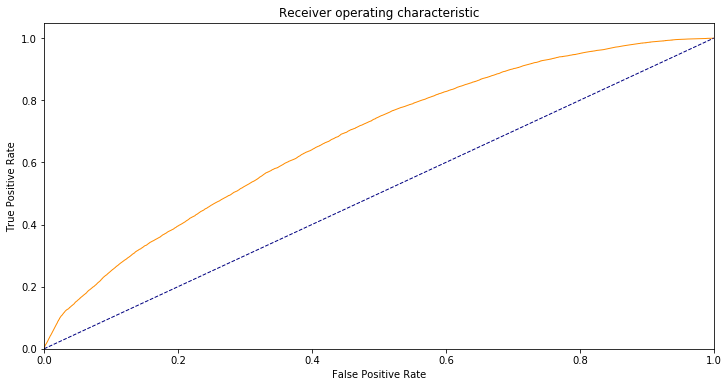

In [95]:
plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, color='darkorange', lw=1)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
plt.show()

In [96]:
from sklearn.metrics import log_loss, roc_auc_score

print("The log loss is : " + str(log_loss(ytest, soft[:,1])))
print("The ROC AUC is : " + str(roc_auc_score(ytest, soft[:,1])))

The log loss is : 0.4251220418138432
The ROC AUC is : 0.6762795302815598


<font color="red">**Question 22:**
    <br>
    - Import the 'plot_lift' function from 'utils.py' and plot the lift curve. What is the lift of the first fifth of the population identified by the test?
    <br>
    -  Interpret it. 
</font>

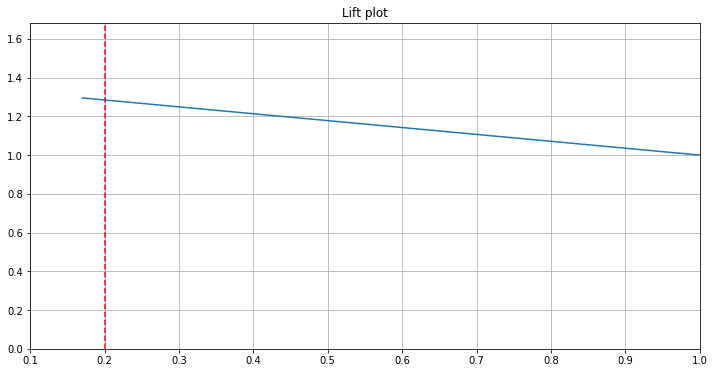

In [97]:
from utils import plotlift
plt.figure(figsize=(12,6))
plotlift(soft[:,1],ytest)
# The following line just plots a vertical line for you to answer the second part of the question
plt.axvline(x= 0.2 , linestyle='--', color='r') # Fill here
plt.title("Lift plot")
plt.show()

The lift for the first fifth of the population is around 1.5. A lift curve shows how likely we are to perform better on the highest predicted probabilities than on the whole sample.

# Complete model

As an example, we now work on the 'site_id' column.
<font color="red">**Question 23:**
    <br>
    - For each modality, compute the number of occurrences in the dataset and the average of clicks for this modality 
    <br>
    - With 'sns.joiplot', represent the set of points (count, mean) for each modality
</font>

In [98]:
import seaborn as sns

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


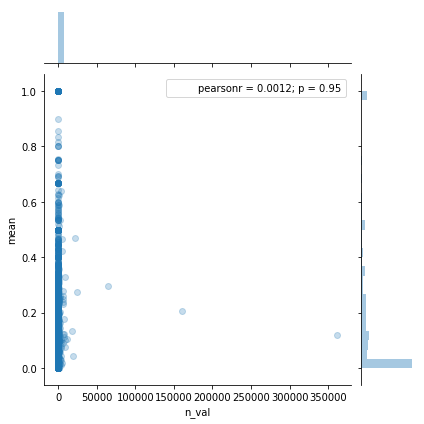

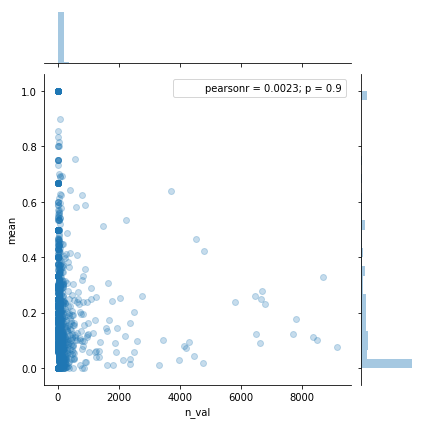

In [99]:
col = 'site_id'
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'n_val']
sns.jointplot(a['n_val'], a['mean'], alpha=0.25);
thres = 10000
sns.jointplot(a[a['n_val']<thres]['n_val'], a[a['n_val']<thres]['mean'], alpha=0.25);

In [100]:
a.head()

,mean,n_val
site_id,,
00255fb4,0.00000,6.0
006ab81e,0.00000,5.0
00b73968,1.00000,1.0
00f5367d,0.00000,2.0
00f648b7,0.26087,23.0


<font color="red">**Question 24:**
    In the above commands, what does the alpha parameter stand for?
</font>

The alpha is the transparency of the points on the graph. 

Several sites with a lot of occurrences in the dataset have a click frequency very different from the mean. It is relevant to keep the column 'site_id' at least for the modalities for which 'count' is very high.
<font color="red">**Question 25:**
    Do the same work on the 'device_id' column. What do you notice? What could be the isolated point?
</font>

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


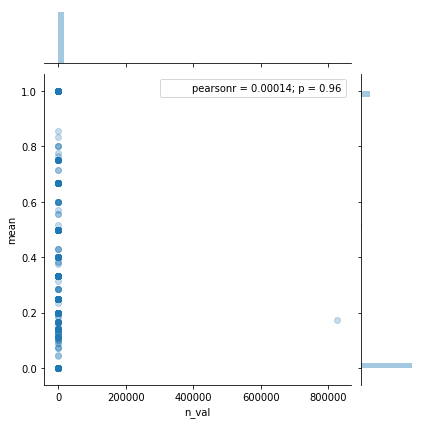

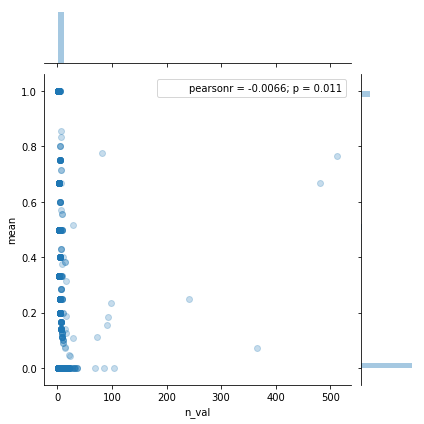

In [101]:
col = ['device_id'] # Fill here
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'n_val']
sns.jointplot(a['n_val'], a['mean'], alpha=0.25);
thres = 200000
sns.jointplot(a[a['n_val']<thres]['n_val'], a[a['n_val']<thres]['mean'], alpha=0.25);

We notice one outlier that has a huge number of clicks. Overall, this means that this massive site is driving the mean of the click rate. We are not able to draw a clear distribution if we don't drop it.

<font color="red">**Question 26**:   
    In the column df['device_id'], spot the value V corresponding to the largest number of 'count' (using '.value_counts' method). Create a new column df['user'] defined as follows:
</font>
$$
\text{user} = \left\{\begin{array}[h]{ll} \text{device_ip + device_model} & \text{if device_id = V}\\ \text{device_id} & \text{else.}\end{array}\right.
$$

In [102]:
df['device_id'].value_counts().idxmax()

'a99f214a'

In [103]:
V = df['device_id'].value_counts().idxmax() # Fill here

df['user'] = np.where(df['device_id'] == V, df['device_ip'] + df['device_model'], df['device_id']) 
# Fill here

<font color="red">**Question 27**:
    Drop the following columns: 'device_id','device_model','device_ip'
</font>

In [104]:
df = df.drop(['device_id', 'device_model', 'device_ip'], axis=1) # Fill here

In [105]:
df.nunique()

id                  1000000
click                     2
hour                     24
C1                        7
banner_pos                7
site_id                2651
site_domain            2871
site_category            22
app_id                 3157
app_domain              198
app_category             26
device_type               5
device_conn_type          4
C14                    2243
C15                       8
C16                       9
C17                     420
C18                       4
C19                      66
C20                     163
C21                      60
weekday                   7
user                 769843
dtype: int64

<font color="red">**Question 28**:
    One could look at the similarity between 'site_id' and 'site_domain'. Merge those columns into a new 'site' column and delete the old 'site_id' and 'site_domain' columns.
</font>

In [106]:
df['site'] = df['site_id'] + df['site_domain'] # Fill here

In [107]:
df = df.drop(['site_id', 'site_domain'], axis=1)

In [108]:
df['site'].head()

0    e151e2457e091613
1    cb809abf74acf31a
2    85f751fdc4e18dd6
3    85f751fdc4e18dd6
4    791b5571fd13bc73
Name: site, dtype: object

<font color="red">**Question 29**:
    Once again, split the modified DataFrame df into a train (90%) and a test set (10%) (with option: random_state = 100).
</font>

In [109]:
X = df.drop(['click', 'id'], axis=1)
y = df['click']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.10, random_state=100)

<font color="red">**Question 30**:
    Define a OneHotEncoder and then, 'fit_transform' the train set.
</font>

In [110]:
ohe = OneHotEncoder(handle_unknown = 'ignore')
Xtrain_oh = ohe.fit_transform(Xtrain) # Fill here

<font color="red">**Question 31**:
    Transform the test set. If an error occurs, analyze it and try to solve it. Which argument did you set ?
</font>

In [111]:
Xtest_oh = ohe.transform(Xtest) # Fill here

As previously explained, I used the handle_unknown = 'ignore' argument.

<font color="red">**Question 32**:
    What is the new number of features?
</font>

In [112]:
Xtrain_oh.shape

(900000, 713334)

We now have 713334 features.

<font color="red">**Question 33**:
    How many modalities have been seen more than a 100 times?
</font>

In [113]:
# The following 'n_ones' vector below gives the number of '1' in each column/modality of the Xtrain_oh design matrix.
n_ones = np.array(Xtrain_oh.sum(axis=0))
sum(sum(n_ones)) # Fill here using 'n_ones'

18000000.0

The list 'cols_to_keep' below is used to store the indices of the modalities seen more than a 100 times. You can notice the use of the 'enumerate' function.

In [114]:
useful = n_ones > 100 # Fill here.
useful = useful[0]

In [115]:
import collections
collections.Counter(useful)

Counter({True: 1971, False: 711363})

There are only 1971 modalities that have been seen more than 100 times.

In [116]:
cols_to_keep = [i*b for i,b in enumerate(useful) if b == True]

In [117]:
len(cols_to_keep)

1971

<font color="red">**Question 34**:
    Using only our restriction on the 'cols_to_keep' columns, retrain a logistic regression model and compare its performance in terms of 'log_loss' and 'roc_auc_curve'.
</font>

In [118]:
Xtrain_oh

<900000x713334 sparse matrix of type '<class 'numpy.float64'>'
	with 18000000 stored elements in Compressed Sparse Row format>

In [119]:
lr = LogisticRegression()
lr.fit(Xtrain_oh[:,cols_to_keep], ytrain)

/home/ubuntu/scikit-learn/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [120]:
hard = lr.predict(Xtest_oh[:,cols_to_keep])
soft = lr.predict_proba(Xtest_oh[:,cols_to_keep])

In [121]:
print("The log loss is : " + str(log_loss(ytest, soft)))
print("The ROC AUC is : " + str(roc_auc_score(ytest, soft[:,1])))

The log loss is : 0.401155619205022
The ROC AUC is : 0.7385971905202147


The log loss decreased and the ROC AUC curve increased. The overall accuracy has therefore improved.

# Gradient Boosting Decision Trees

<font color="red">**Question 35**:
    <br>
    - Import GradientBoostingClassifier from scikit learn. 
    <br>
    - Initialize it using 50 estimators and a learning rate of 0.8. Set 'verbose=True' to monitor the progress of the algorithm.
    <br>
    - Fit it on the same columns 'cols_to_keep' of Xtrain_oh than for the previous logistic regression.
    <br>
    - Evaluate its performance as in the previous step.
</font>

In [122]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.8, verbose=True) # Fill here
gb.fit(Xtrain_oh[:,cols_to_keep], ytrain)

      Iter       Train Loss   Remaining Time 
         1           0.8743            3.88m
         2           0.8646            3.69m
         3           0.8583            3.60m
         4           0.8535            3.49m
         5           0.8503            3.41m
         6           0.8464            3.34m
         7           0.8441            3.28m
         8           0.8418            3.22m
         9           0.8404            3.14m
        10           0.8383            3.05m
        20           0.8282            2.28m
        30           0.8234            1.52m
        40           0.8190           45.60s
        50           0.8163            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.8, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=True, warm_start=False)

In [123]:
soft = gb.predict_proba(Xtest_oh[:,cols_to_keep])
print("The log loss is : " + str(log_loss(ytest, soft)))
print("The ROC AUC is : " + str(roc_auc_score(ytest, soft[:,1])))

The log loss is : 0.4091941969746683
The ROC AUC is : 0.725178391886119


<font color="red">**Question 36**:
    What does the 'gb.estimators_' output?
</font>

In [124]:
gb.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x7f7b441948b8>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x7f7b441948b8>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, 

It outputs the collection of fitted sub-estimators.

We now try to use the 'gb' classifier to generate features that will be relevant inputs for the logistic regression.
<font color="red">**Question 37**:
    With the 'gb.apply()' method, generate a transformation 'leafs_train' of the training set 'Xtrain_oh[:, cols_to_keep]' for which the nth column corresponds to the number of the leaf returned by the estimator n.
</font>

In [125]:
leafs_train = gb.apply(Xtrain_oh[:,cols_to_keep])[:,:,0] # Fill here.
leafs_test = gb.apply(Xtest_oh[:,cols_to_keep])[:,:,0] # Fill here.

In [126]:
leafs_train

array([[ 3.,  3.,  3., ...,  3.,  3.,  3.],
       [ 3.,  3.,  3., ...,  3.,  3.,  3.],
       [ 3.,  3.,  3., ...,  3.,  3.,  3.],
       ...,
       [ 3.,  3.,  3., ...,  3.,  3.,  3.],
       [ 3.,  3.,  3., ...,  3.,  3.,  3.],
       [ 3., 13.,  3., ...,  3.,  3.,  3.]])

After your applied gb.apply on Xtrain_oh[:, cols_to_keep], remember that use have only one class to predict (click = 0 or 1). 

In [127]:
leafs_train = pd.DataFrame(leafs_train) # Fill here
leafs_test = pd.DataFrame(leafs_test)

<font color="red">**Question 38**:
    Encode these new features into dummies.
</font>

In [128]:
ohe = OneHotEncoder(handle_unknown = 'ignore') # Fill here an argument if needed
leafs_train_oh = ohe.fit_transform(leafs_train)
leafs_test_oh = ohe.transform(leafs_test)

<font color="red">**Question 39**:
    With the "hstack" function, create a new matrix of features by concatenating horizontally our new features "leafs_train_oh" and "leafs_test_oh", and previous features used for logistic regression (e.g. in "Xtrain_oh[:, cols_to_keep]").
</font>
<br><br>
**Remark**: we use "hstack" from scipy.sparse (and not from numpy) because the output of our OneHotEncoder is a sparse array. You can verify it with the command "type(Xtrain_oh)".

In [129]:
from scipy.sparse import csr_matrix, hstack
Xtrain_concat = hstack([ Xtrain_oh[:,cols_to_keep] , leafs_train_oh ]) # Fill here

In [130]:
Xtest_concat = hstack([ Xtest_oh[:,cols_to_keep] , leafs_test_oh ])

In [131]:
type(Xtrain_concat)

scipy.sparse.coo.coo_matrix

<font color="red">**Question 40**:
    Run a logistic regression on the new features and evaluate its performance as before.
</font>

In [132]:
lr = LogisticRegression()
lr.fit(Xtrain_concat, ytrain)
#lr.predict(Xtest_concat)

soft = lr.predict_proba(Xtest_concat)
# Fill here

/home/ubuntu/scikit-learn/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [133]:
print("The log loss is : " + str(log_loss(ytest, soft)))
print("The ROC AUC is : " + str(roc_auc_score(ytest, soft[:,1])))

The log loss is : 0.3999467948319651
The ROC AUC is : 0.7417398982342002


The log-loss decreases and the ROC AUC Score increases.

<font color="red">**Question 41**:
    <br>
    - Import XGBClassifier from xgboost package.
    <br>
    - Initialize it using the same number of estimators and learning rate as before. 
    <br>
    - Which value of n_jobs did you choose?
    <br>
    - Fit it on the same columns 'cols_to_keep' of Xtrain_oh than for the previous logistic regression.
    <br>
    - Evaluate its performance and compare it to the GradientBoosting classifier of scikit learn. How is the error? Does it take more time to run?
</font>

In [134]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 50,n_jobs = -1,learning_rate = 0.8)
%time xgb.fit(Xtrain_oh[:,cols_to_keep], ytrain)

CPU times: user 55.1 s, sys: 296 ms, total: 55.4 s
Wall time: 11.3 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

I chose n_jobs = -1 to improve the computation time.

In [135]:
#xgb.predict(Xtest_oh[:,cols_to_keep])
soft = xgb.predict_proba(Xtest_oh[:,cols_to_keep])
print("The log loss is : " + str(log_loss(ytest, soft)))
print("The ROC AUC is : " + str(roc_auc_score(ytest, soft[:,1])))

The log loss is : 0.4078966572208656
The ROC AUC is : 0.7244454605414952


The log loss decreases which is good, but the roc_auc_score is much lower. The computation time is however much quicker.

<font color="red">**Question 42**:
    Increase the number of estimators (e.g. 1024) and visualize the impact on performance. You might have to adapt the learning rate.
</font>

In [136]:
xgb = XGBClassifier(n_estimators = 1024,n_jobs = -1,learning_rate = 1)
%time xgb.fit(Xtrain_oh[:,cols_to_keep], ytrain) # Fill here

CPU times: user 16min 52s, sys: 2.56 s, total: 16min 55s
Wall time: 2min 11s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1024,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [137]:
#xgb.predict(Xtest_oh)
soft = xgb.predict_proba(Xtest_oh[:,cols_to_keep])
print("The log loss is : " + str(log_loss(ytest, soft)))
print("The ROC AUC is : " + str(roc_auc_score(ytest, soft[:,1])))

The log loss is : 0.4032496677497013
The ROC AUC is : 0.7398608227679364


The increase in the number of estimators allows us to increase the roc_auc_score and to decrease the log loss. However, the computation time has dramatically increased.

# Features hashing and random forest

We restart with raw features before dummy encoding: Xtrain, Xtest.
<font color="red">**Question 43**:
    Display again the number of modalities per feature in Xtrain.
</font>

In [138]:
Xtrain.nunique()

hour                    24
C1                       7
banner_pos               7
site_category           22
app_id                3054
app_domain             196
app_category            26
device_type              5
device_conn_type         4
C14                   2225
C15                      8
C16                      9
C17                    420
C18                      4
C19                     66
C20                    163
C21                     60
weekday                  7
user                701585
site                  5442
dtype: int64

We want to define a transformation which regroups the least frequent modalities into a label 'isRare'. In order to do so, we decide to define our own Transformer.
<font color="red">**Question 44**:
    Understand the different steps of 'fit' and 'transform'.
</font>

In [139]:
from sklearn.base import BaseEstimator, TransformerMixin

class MergeRareTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, col_names, threshold):
        self.col_names = col_names
        self.threshold = threshold

    def fit(self, X, y=None):

        X = pd.DataFrame(X)
        counts_dict_list = []
        
        ################## READ THIS #########################
        for i in range(len(self.col_names)):
            
            serie = X[self.col_names[i]].value_counts()  # Série des counts de chaque modalité
            rare_indexes = serie[serie<self.threshold[i]].index  # Les indices des features les moins fréquentes < au seuil
            frequent_indexes = serie[serie>=self.threshold[i]].index  # Les indices des features les plus fréquentes
            dico = {x:'isRare' for x in rare_indexes}
            dico.update({x: str(x) for x in frequent_indexes})
            counts_dict_list.append(dico)   # Un index isRare pour les données rares, et x lui-même pour les données fréquentes
            
        ######################################################
            
        self.counts_dict_list_ = counts_dict_list
        return self

    def transform(self, X):

        Xt = pd.DataFrame()
        
        ################## READ THIS #########################
        
        for col, count_dict in zip(self.col_names, self.counts_dict_list_):
            Xt[col] = X[col].apply(lambda x:count_dict[x] if x in count_dict else 'isRare')
            
            # A quoi sert le "else 'isRare'" dans la transformation de la colonne ?
            # Le 'isRare' sert à noter 'isRare' pour les nouvelles données jamais observées, et appliquer le count_dict aux autres.
        ######################################################

        return Xt


<font color="red">**Question 45:**
    <br>
    - Fit and transform the training set. To do so, merge all mmodalities occuring at least 20 times in each column.
    <br>
    - Transform the test set.
</font>

In [140]:
mg = MergeRareTransformer(col_names=Xtrain.columns, threshold=[20]*len(Xtrain.columns))
Xtrain_mg = mg.fit_transform(Xtrain) # Fill here with fit_transform or fit then transform.
Xtest_mg = mg.transform(Xtest)

<font color="red">**Question 46:**
   How many elements of the column Xtrain_mg['app_domain'] are now labeled as 'rare'?
</font>

In [141]:
sum(Xtrain_mg['app_domain'] == 'isRare') # Fill here

513

We have 513 rare datas out of 900'000 data points, which is a reasonable amount of rare datas.

<font color="red">**Question 47:**
   In the new train set, display the number of modalities for each feature.
</font>

In [142]:
Xtrain_mg.nunique() # Fill here

hour                  24
C1                     7
banner_pos             7
site_category         18
app_id               613
app_domain            53
app_category          19
device_type            5
device_conn_type       4
C14                 1339
C15                    8
C16                    9
C17                  381
C18                    4
C19                   63
C20                  148
C21                   60
weekday                7
user                 901
site                 889
dtype: int64

Modalities are arbitrary object, such as '234', 'isRare', etc. We will now transorm them into integers with the hashing trick.
<font color="red">**Question 48:**
   To better understand how the 'hash' function is working, apply it to a string of your choice.
</font>

In [143]:
import hashlib
hash('hello from the other side') # Fill here

-3283540004345137673

<font color="red">**Question 49:**
   Create two new datasets 'Xtrain_ha' and 'Xtest_ha' containing the output of the hashing process. Use the '.apply' method to transform iteratively the columns by mapping to each value its remainder in the euclidean division of the hash by 1000000. 
   Example:
</font>
</font>
<p>
<center>
2060777048690<font color="red">918393</font>  -->  918393
</center>
Remark: do not forget that the function 'hash' has to take a string as input.

In [144]:
Xtrain_ha = pd.DataFrame()
Xtest_ha = pd.DataFrame()
for col in Xtrain_mg.columns:
    Xtrain_ha[col] = Xtrain_mg[col].apply(lambda x : hash(str(x)) % 1000000) # Fill here defining a lambda function
    Xtest_ha[col] = Xtest_mg[col].apply(lambda x : hash( str(x)) % 1000000)

<font color="red">**Question 50:**
   Visualize the content of the DataFrames you have obtained.
</font>

In [145]:
Xtrain_ha.tail() # Fill here

,hour,C1,banner_pos,site_category,app_id,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday,user,site
864087,4446,758049,308882,284485,663626,152519,482402,308882,772298,847328,667711,597520,171462,772298,876307,133483,228935,661989,651001,115976
778087,174384,758049,772298,67389,385542,222881,676104,308882,772298,312527,667711,597520,885199,772298,876307,920105,787378,308882,651001,991351
210755,93705,758049,772298,693137,663626,152519,482402,308882,772298,805759,667711,597520,222908,772298,901675,133483,978728,595783,651001,803961
56088,855067,758049,308882,107496,663626,152519,482402,308882,772298,216613,667711,597520,165490,772298,876307,58156,787378,595783,651001,741152
824840,207933,758049,772298,284485,663626,152519,482402,308882,772298,496096,667711,597520,171462,772298,876307,835254,228935,308882,651001,117175


In [146]:
Xtest_ha.head() 

,hour,C1,banner_pos,site_category,app_id,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday,user,site
617759,207933,758049,308882,693137,663626,152519,482402,308882,772298,240805,667711,597520,795573,595783,901675,133483,818821,661989,651001,727727
693227,356800,758049,772298,284485,663626,152519,482402,308882,772298,132631,667711,597520,195965,595783,603214,246131,748127,595783,651001,353872
906065,927192,758049,308882,693137,663626,152519,482402,308882,772298,337718,667711,597520,903537,661989,876307,915223,145351,252995,651001,206459
828507,207933,758049,772298,67389,596908,222881,676104,308882,772298,425277,667711,597520,472774,661989,664581,663082,560186,661989,651001,991351
869730,356800,765578,772298,67389,663626,152519,482402,772298,772298,580962,667711,597520,978859,595783,901675,133483,818821,595783,651001,51032


<font color="red">**Question 51:**
    <br>
    - Train a RandomForestClassifier on Xtrain_ha and evaluate its performance on Xtest_ha. One can chose 1024 estimators, min_samples_leaf=20 and verbose=1 in order to monitor the fitting step.
    <br>
</font>

In [147]:
from sklearn.ensemble import RandomForestClassifier # Fill here
rf = RandomForestClassifier(n_estimators = 1024, min_samples_leaf = 20, verbose = 1, n_jobs = -1)
rf.fit(Xtrain_ha, ytrain)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed:  7.4min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1024, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [148]:
soft = rf.predict_proba(Xtest_ha)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    5.4s
[Parallel(n_jobs=8)]: Done 1024 out of 1024 | elapsed:    7.0s finished


In [149]:
print("The log loss is : " + str(log_loss(ytest, soft)))
print("The ROC AUC is : " + str(roc_auc_score(ytest, soft[:,1])))

The log loss is : 0.4007716705135834
The ROC AUC is : 0.7414204358558852


<font color="red">**Question 52:**
   Compare with xgboost performance on the same hashed dataset.
</font>

In [150]:
xgb = XGBClassifier(n_estimators = 1024,n_jobs = -1,learning_rate = 1)
%time xgb.fit(Xtrain_ha, ytrain) # Fill here
soft = xgb.predict_proba(Xtest_ha)
print("The log loss is : " + str(log_loss(ytest, soft)))
print("The ROC AUC is : " + str(roc_auc_score(ytest, soft[:,1])))

CPU times: user 19min 43s, sys: 5.05 s, total: 19min 48s
Wall time: 2min 28s
The log loss is : 0.3996620087252306
The ROC AUC is : 0.743639510656227


The XGBClassifier performs better in this specific case.

<font color="red">**Question 53:**
    Plot the ROC and the lift curves for the obtained classifier (xgboost on hashed data).
</font>

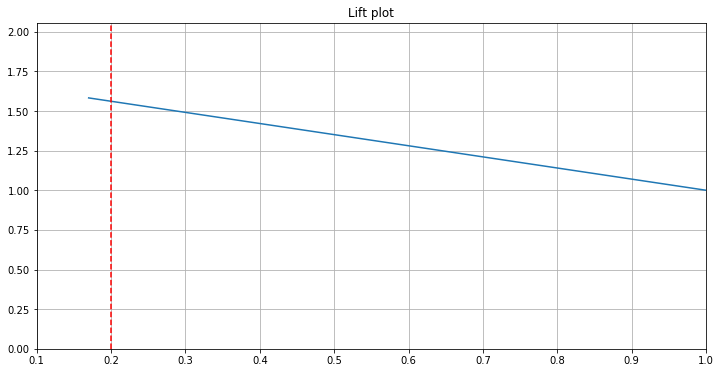

In [151]:
# Plot the lift curve here
plt.figure(figsize=(12,6))
plotlift(soft[:,1],ytest)
# The following line just plots a vertical line for you to answer the second part of the question
plt.axvline(x= 0.2 , linestyle='--', color='r') # Fill here
plt.title("Lift plot")
plt.show()

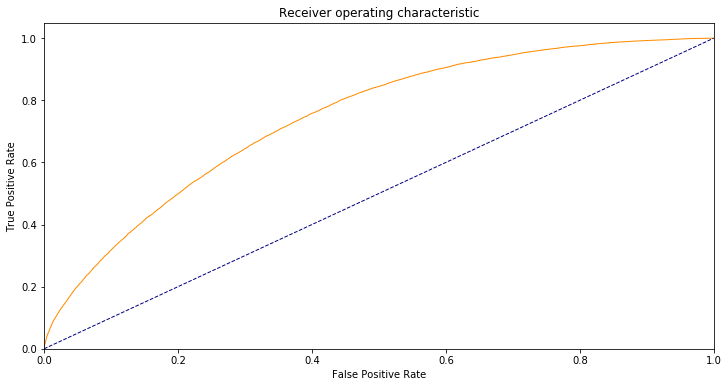

In [152]:
# Plot the ROC curve here
fpr, tpr, thresholds = roc_curve(ytest, soft[:,1]) # Fill here.
plt.figure(figsize=(12,6))
plt.plot(fpr, tpr, color='darkorange', lw=1)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
plt.show()

Hashing produces columns of integers arbitrarily ordered. One can wonder if adding more columns hashed in a different fashion would lead to better performance. 
<font color="red">**Question 54:**
    Add hashed columns by recursively hashing the previous ones: complete the following code. 
</font>

In [153]:
Xtrain_haha = pd.DataFrame(Xtrain_ha).copy()
Xtest_haha = pd.DataFrame(Xtest_ha).copy()

n_hash = 3
cols = Xtrain_ha.columns
for l in range(n_hash):
    for col in cols:
        Xtrain_haha[col + '-hash'] = Xtrain_haha[col].apply(lambda x : hash(str(x)) % 1000000)
        Xtest_haha[col + '-hash'] = Xtest_haha[col].apply(lambda x : hash(str(x)) % 1000000)
    cols = [col + '-hash' for col in cols]

<font color="red">**Question 55:**
    Evaluate the performance of a random forest and/or an xgboost clasifier on these enlarged dataset.
</font>

In [154]:
# Random Forest
rf = RandomForestClassifier(n_estimators = 1024, min_samples_leaf = 20, verbose = 1, n_jobs = -1)
rf.fit(Xtrain_haha, ytrain)
soft = rf.predict_proba(Xtest_haha)
print("The log loss is : " + str(log_loss(ytest, soft)))
print("The ROC AUC is : " + str(roc_auc_score(ytest, soft[:,1])))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed: 12.9min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    4.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    7.3s


The log loss is : 0.3986712471801392
The ROC AUC is : 0.7447054983570616


[Parallel(n_jobs=8)]: Done 1024 out of 1024 | elapsed:    9.6s finished


In [155]:
xgb = XGBClassifier(n_estimators = 1024,n_jobs = -1,learning_rate = 1)
xgb.fit(Xtrain_haha, ytrain) # Fill here
soft = xgb.predict_proba(Xtest_haha)
print("The log loss is : " + str(log_loss(ytest, soft)))
print("The ROC AUC is : " + str(roc_auc_score(ytest, soft[:,1])))

The log loss is : 0.402019185090081
The ROC AUC is : 0.7407334690515777


The performance of the Random Forest increased, and decreased with the XGBoost.

<font color="red">**Question 56:**
    Compare the different models used in the TP.
</font>

The different models in the TP are the following :
- the logistic regression
- the Gradient Boosting
- the XGBoost 
- the Random Forest


The logistic regression works well when we select mostly the relevant columns. This model might underfit the complexity of the problem when we have too many features.


The gradient boosting decision tree is hard to overfit since it is an ensemble model. The accuracy obtained is much closer to results obtained by XGBoost or Random Forest, but the computation time is long.


The XGBoost works well on many features, and is much faster to train. However, increasing the number of estimators comes at a computational cost.


The random forest is long to fit, and there is a risk to overfit if the depth is too important. However, using more estimators in the ensemble model allows a more robust model.

<h1><center>BONUS<center></h1>

# Field-aware Factorization Machines
<br>
<font color="red">
Afficher les noms des colonnes de la matrice Xtrain_ha
</font>

In [156]:
Xtrain_ha.columns

Index(['hour', 'C1', 'banner_pos', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'weekday', 'user', 'site'],
      dtype='object')

<font color="red">
Créer une liste de liste de colonnes. La nème sous-liste comporte les noms des colonnes du nème champ.</font>

In [157]:
Xtrain_ha['hour'].unique()

array([356800, 132498, 728304, 174384, 145351, 661989, 927192, 745394,
       308882,  93705,   4446, 252995, 546498, 619777, 850654, 207933,
       748802, 965458, 855067, 609656, 595783, 652273, 772298, 711293])

In [159]:
fields = []
fields.append(['weekday', 'hour'])
fields.append(['banner_pos', 'user', 'C1'])
fields.append(['C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'])
fields.append(['site_category', 'site'])
fields.append(['app_id', 'app_domain', 'app_category'])
fields.append(['device_type', 'device_conn_type'])

In [160]:
fields

[['weekday', 'hour'],
 ['banner_pos', 'user', 'C1'],
 ['C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
 ['site_category', 'site'],
 ['app_id', 'app_domain', 'app_category'],
 ['device_type', 'device_conn_type']]

<font color="red">
Avec enumerate, générer un dictionnaire qui à chaque nom de colonne associe son champ.</font>

In [161]:
dicFields = {name_col : i for i,f in enumerate(fields) for name_col in f}

In [162]:
dicFields

{'weekday': 0,
 'hour': 0,
 'banner_pos': 1,
 'user': 1,
 'C1': 1,
 'C14': 2,
 'C15': 2,
 'C16': 2,
 'C17': 2,
 'C18': 2,
 'C19': 2,
 'C20': 2,
 'C21': 2,
 'site_category': 3,
 'site': 3,
 'app_id': 4,
 'app_domain': 4,
 'app_category': 4,
 'device_type': 5,
 'device_conn_type': 5}

Pour formatter les données au format LibFFM, nous devons nous assurer que deux colonnes différentes possèdent des modalités différentes. Pour cela, nous ajoutons devant chaque modalité une chaîne de caractère caractéristique de la colonne.
<center>
x --> 'nom de la colonne ' + str(x)
</center>
<br>
<font color="red">Effectuer cette transformation avec la méthode apply</font>

In [164]:
Xtrain_ffm = pd.DataFrame()
Xtest_ffm = pd.DataFrame()
for col in Xtrain_ha.columns:
    Xtrain_ffm[col] = Xtrain_ha[col].apply(lambda x : str(col) + str(x))
    Xtest_ffm[col] = Xtest_ha[col].apply(lambda x : str(col) + str(x))

In [165]:
Xtrain_ffm.head()

,hour,C1,banner_pos,site_category,app_id,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday,user,site
92438,hour356800,C1722883,banner_pos308882,site_category67389,app_id708206,app_domain152519,app_category676104,device_type728304,device_conn_type661989,C14496096,C15667711,C16597520,C17171462,C18772298,C19876307,C20133483,C21228935,weekday772298,user651001,site991351
60898,hour132498,C1758049,banner_pos772298,site_category67389,app_id184509,app_domain222881,app_category714039,device_type308882,device_conn_type595783,C14496096,C15667711,C16597520,C17171462,C18772298,C19876307,C20133483,C21228935,weekday308882,user651001,site991351
556199,hour728304,C1758049,banner_pos772298,site_category693137,app_id663626,app_domain152519,app_category482402,device_type308882,device_conn_type595783,C14932631,C15667711,C16597520,C17401646,C18772298,C1968222,C20133483,C2132359,weekday772298,user651001,site443385
193129,hour174384,C1758049,banner_pos308882,site_category693137,app_id663626,app_domain152519,app_category482402,device_type308882,device_conn_type772298,C1460330,C15667711,C16597520,C17296341,C18772298,C19200130,C2058156,C2178702,weekday308882,user651001,site206459
231985,hour145351,C1758049,banner_pos772298,site_category284485,app_id663626,app_domain152519,app_category482402,device_type308882,device_conn_type772298,C14343520,C15667711,C16597520,C17171462,C18772298,C19876307,C20835254,C21228935,weekday207933,user651001,site117175


Avec np.unique, on créée la liste de toutes les modalités apparaissant dans toutes les colonnes.

In [166]:
allvals = []
allcols_ffm = [col for f in fields for col in f]  # Toutes les colonnes appartenant à l'un des champ
for col in allcols_ffm:
    allvals.append(np.unique(Xtrain_ffm[col]))
allvals= [val for sublist in allvals for val in sublist]

In [167]:
allvals

['weekday207933',
 'weekday252995',
 'weekday308882',
 'weekday595783',
 'weekday661989',
 'weekday728304',
 'weekday772298',
 'hour132498',
 'hour145351',
 'hour174384',
 'hour207933',
 'hour252995',
 'hour308882',
 'hour356800',
 'hour4446',
 'hour546498',
 'hour595783',
 'hour609656',
 'hour619777',
 'hour652273',
 'hour661989',
 'hour711293',
 'hour728304',
 'hour745394',
 'hour748802',
 'hour772298',
 'hour850654',
 'hour855067',
 'hour927192',
 'hour93705',
 'hour965458',
 'banner_pos252995',
 'banner_pos308882',
 'banner_pos595783',
 'banner_pos661989',
 'banner_pos728304',
 'banner_pos772298',
 'banner_pos93705',
 'user100861',
 'user102332',
 'user103240',
 'user104199',
 'user106456',
 'user107224',
 'user108774',
 'user109514',
 'user11033',
 'user11098',
 'user113635',
 'user114080',
 'user114105',
 'user114829',
 'user117574',
 'user119006',
 'user119234',
 'user119526',
 'user120668',
 'user121413',
 'user121560',
 'user121669',
 'user122372',
 'user126439',
 'user12650',

<font color="red">
En utilisant "enumerate", créer un dictionnaire qui à chaque valeur associe son rang dans la liste allvals.</font>

In [168]:
dicFeat = {val:i for i,val in enumerate(allvals) }

In [169]:
dicFeat

{'weekday207933': 0,
 'weekday252995': 1,
 'weekday308882': 2,
 'weekday595783': 3,
 'weekday661989': 4,
 'weekday728304': 5,
 'weekday772298': 6,
 'hour132498': 7,
 'hour145351': 8,
 'hour174384': 9,
 'hour207933': 10,
 'hour252995': 11,
 'hour308882': 12,
 'hour356800': 13,
 'hour4446': 14,
 'hour546498': 15,
 'hour595783': 16,
 'hour609656': 17,
 'hour619777': 18,
 'hour652273': 19,
 'hour661989': 20,
 'hour711293': 21,
 'hour728304': 22,
 'hour745394': 23,
 'hour748802': 24,
 'hour772298': 25,
 'hour850654': 26,
 'hour855067': 27,
 'hour927192': 28,
 'hour93705': 29,
 'hour965458': 30,
 'banner_pos252995': 31,
 'banner_pos308882': 32,
 'banner_pos595783': 33,
 'banner_pos661989': 34,
 'banner_pos728304': 35,
 'banner_pos772298': 36,
 'banner_pos93705': 37,
 'user100861': 38,
 'user102332': 39,
 'user103240': 40,
 'user104199': 41,
 'user106456': 42,
 'user107224': 43,
 'user108774': 44,
 'user109514': 45,
 'user11033': 46,
 'user11098': 47,
 'user113635': 48,
 'user114080': 49,
 'u

On les dataframe comme suit : 
dans chaque colonne "col", la valeur "x" est remplacée par la chaîne de caractère "f:v:1", où f est le champ associé à la colonne et v est l'indice de la modalité x.
<font color="red">
Inspecter le code ci-dessous.</font>

In [170]:
for col in allcols_ffm:
    f = dicFields[col]
    Xtrain_ffm[col] = Xtrain_ffm[col].apply(lambda x:"{}:{}:1".format(f,dicFeat[x]) if x in dicFeat else "")
    Xtest_ffm[col] = Xtest_ffm[col].apply(lambda x:"{}:{}:1".format(f,dicFeat[x]) if x in dicFeat else "")

In [171]:
Xtrain_ffm.head()

,hour,C1,banner_pos,site_category,app_id,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday,user,site
92438,0:13:1,1:941:1,1:32:1,3:2967:1,4:4262:1,4:4477:1,4:4535:1,5:4548:1,5:4552:1,2:1541:1,2:2285:1,2:2292:1,2:2328:1,2:2682:1,2:2739:1,2:2754:1,2:2903:1,0:6:1,1:582:1,3:3851:1
60898,0:7:1,1:942:1,1:36:1,3:2967:1,4:3913:1,4:4482:1,4:4536:1,5:4546:1,5:4551:1,2:1541:1,2:2285:1,2:2292:1,2:2328:1,2:2682:1,2:2739:1,2:2754:1,2:2903:1,0:2:1,1:582:1,3:3851:1
556199,0:22:1,1:942:1,1:36:1,3:2968:1,4:4233:1,4:4477:1,4:4532:1,5:4546:1,5:4551:1,2:2187:1,2:2285:1,2:2292:1,2:2425:1,2:2682:1,2:2717:1,2:2754:1,2:2910:1,0:6:1,1:582:1,3:3308:1
193129,0:9:1,1:942:1,1:32:1,3:2968:1,4:4233:1,4:4477:1,4:4532:1,5:4546:1,5:4553:1,2:1711:1,2:2285:1,2:2292:1,2:2387:1,2:2682:1,2:2690:1,2:2822:1,2:2939:1,0:2:1,1:582:1,3:3060:1
231985,0:8:1,1:942:1,1:36:1,3:2958:1,4:4233:1,4:4477:1,4:4532:1,5:4546:1,5:4553:1,2:1323:1,2:2285:1,2:2292:1,2:2328:1,2:2682:1,2:2739:1,2:2860:1,2:2903:1,0:0:1,1:582:1,3:2979:1


<font color="red">Pour les deux dataframe obtenues, concaténer à gauche la colonne de clics ytrain ou ytest correspondante</font>

In [172]:
yXtrain_ffm = pd.concat([ytrain.astype(str), Xtrain_ffm],axis=1)
yXtest_ffm = pd.concat([ytest.astype(str), Xtest_ffm],axis=1)

In [173]:
yXtrain_ffm.head()

,click,hour,C1,banner_pos,site_category,app_id,app_domain,app_category,device_type,device_conn_type,...,C15,C16,C17,C18,C19,C20,C21,weekday,user,site
92438,1,0:13:1,1:941:1,1:32:1,3:2967:1,4:4262:1,4:4477:1,4:4535:1,5:4548:1,5:4552:1,...,2:2285:1,2:2292:1,2:2328:1,2:2682:1,2:2739:1,2:2754:1,2:2903:1,0:6:1,1:582:1,3:3851:1
60898,0,0:7:1,1:942:1,1:36:1,3:2967:1,4:3913:1,4:4482:1,4:4536:1,5:4546:1,5:4551:1,...,2:2285:1,2:2292:1,2:2328:1,2:2682:1,2:2739:1,2:2754:1,2:2903:1,0:2:1,1:582:1,3:3851:1
556199,0,0:22:1,1:942:1,1:36:1,3:2968:1,4:4233:1,4:4477:1,4:4532:1,5:4546:1,5:4551:1,...,2:2285:1,2:2292:1,2:2425:1,2:2682:1,2:2717:1,2:2754:1,2:2910:1,0:6:1,1:582:1,3:3308:1
193129,0,0:9:1,1:942:1,1:32:1,3:2968:1,4:4233:1,4:4477:1,4:4532:1,5:4546:1,5:4553:1,...,2:2285:1,2:2292:1,2:2387:1,2:2682:1,2:2690:1,2:2822:1,2:2939:1,0:2:1,1:582:1,3:3060:1
231985,0,0:8:1,1:942:1,1:36:1,3:2958:1,4:4233:1,4:4477:1,4:4532:1,5:4546:1,5:4553:1,...,2:2285:1,2:2292:1,2:2328:1,2:2682:1,2:2739:1,2:2860:1,2:2903:1,0:0:1,1:582:1,3:2979:1


<font color="red">Que produit la commande ci-dessous ?</font>

In [174]:
train_w = yXtrain_ffm.apply(lambda row:' '.join(row.values),axis=1).values
test_w = yXtest_ffm.apply(lambda row:' '.join(row.values),axis=1).values

In [175]:
train_w

array(['1 0:13:1 1:941:1 1:32:1 3:2967:1 4:4262:1 4:4477:1 4:4535:1 5:4548:1 5:4552:1 2:1541:1 2:2285:1 2:2292:1 2:2328:1 2:2682:1 2:2739:1 2:2754:1 2:2903:1 0:6:1 1:582:1 3:3851:1',
       '0 0:7:1 1:942:1 1:36:1 3:2967:1 4:3913:1 4:4482:1 4:4536:1 5:4546:1 5:4551:1 2:1541:1 2:2285:1 2:2292:1 2:2328:1 2:2682:1 2:2739:1 2:2754:1 2:2903:1 0:2:1 1:582:1 3:3851:1',
       '0 0:22:1 1:942:1 1:36:1 3:2968:1 4:4233:1 4:4477:1 4:4532:1 5:4546:1 5:4551:1 2:2187:1 2:2285:1 2:2292:1 2:2425:1 2:2682:1 2:2717:1 2:2754:1 2:2910:1 0:6:1 1:582:1 3:3308:1',
       ...,
       '0 0:29:1 1:942:1 1:36:1 3:2968:1 4:4233:1 4:4477:1 4:4532:1 5:4546:1 5:4553:1 2:1994:1 2:2285:1 2:2292:1 2:2352:1 2:2682:1 2:2743:1 2:2754:1 2:2952:1 0:3:1 1:582:1 3:3667:1',
       '1 0:27:1 1:942:1 1:32:1 3:2954:1 4:4233:1 4:4477:1 4:4532:1 5:4546:1 5:4553:1 2:1111:1 2:2285:1 2:2292:1 2:2324:1 2:2682:1 2:2739:1 2:2822:1 2:2940:1 0:3:1 1:582:1 3:3606:1',
       '0 0:10:1 1:942:1 1:36:1 3:2958:1 4:4233:1 4:4477:1 4:4532:1 5:4546

Cela concatène toutes les valeurs d'une même ligne.

<font color="red">Ecrire les dataframe ci-dessus dans un fichier texte</font>

In [197]:
thefile = open('train.txt','w')
for item in train_w:
    thefile.write("%s\n" % item)

In [198]:
# Faire de même pour le test set
thefile2 = open('test.txt','w')
for item in test_w:
    thefile2.write("%s\n" % item)

Pour apprendre le modèle de FFM, on utilise la librairie LibFFM https://www.csie.ntu.edu.tw/~cjlin/libffm/  
Dans le répertoire notebooks/ se trouvent deux exécutables : ffm-train et ffm-predict.  
Dans jupyter notebook, le point d'exclamation ! permet de lancer une commande bash.  
L'usage est le suivant : 

-   `ffm-train'

    usage: ffm-train [options] training_set_file [model_file]

    options:  
    -l <lambda>: set regularization parameter (default 0.00002)  
    -k <factor>: set number of latent factors (default 4)  
    -t <iteration>: set number of iterations (default 15)  
    -r <eta>: set learning rate (default 0.2)  
    -s <nr_threads>: set number of threads (default 1)  
    -p <path>: set path to the validation set  
    --quiet: quiet model (no output)  
    --no-norm: disable instance-wise normalization  
    --auto-stop: stop at the iteration that achieves the best validation loss (must be used with -p)  
<br>
<font color="red">Apprendre le modèle. On pourra :  
- utiliser un paramètre de régularisation de 0.00001  
- utiliser un learning rate de 0.05  
- utiliser de l'ordre de 15 facteurs latents
- effectuer de l'ordre de 30 itérations  
- avec l'option -p, passer en paramètres de validation le ficher de test  
- activer le mode --autostop 
</font> 

In [199]:
!/home/ubuntu/notebooks/ffm-train

usage: ffm-train [options] training_set_file [model_file]

options:
-l <lambda>: set regularization parameter (default 0.00002)
-k <factor>: set number of latent factors (default 4)
-t <iteration>: set number of iterations (default 15)
-r <eta>: set learning rate (default 0.2)
-s <nr_threads>: set number of threads (default 1)
-p <path>: set path to the validation set
--quiet: quiet mode (no output)
--no-norm: disable instance-wise normalization
--auto-stop: stop at the iteration that achieves the best validation loss (must be used with -p)



In [200]:
!/home/ubuntu/libffm/ffm-train -l 0.00001 -k 15 -t 30 -r 0.05 -s 4 -p /home/ubuntu/notebooks/test.txt /home/ubuntu/notebooks/train.txt model-avazu_2


First check if the text file has already been converted to binary format (0.0 seconds)
Binary file NOT found. Convert text file to binary file (3.1 seconds)
First check if the text file has already been converted to binary format (0.0 seconds)
Binary file NOT found. Convert text file to binary file (0.4 seconds)
iter   tr_logloss   va_logloss      tr_time
   1      0.41048      0.40383          2.6
   2      0.40282      0.40090          5.1
   3      0.40079      0.39955          7.6
   4      0.39954      0.39858         10.1
   5      0.39860      0.39812         12.7
   6      0.39791      0.39789         15.2
   7      0.39734      0.39731         17.7
   8      0.39683      0.39710         20.2
   9      0.39636      0.39693         22.7
  10      0.39599      0.39668         25.2
  11      0.39560      0.39667         27.7
  12      0.39529      0.39633         30.2
  13      0.39499      0.39624         32.8
  14      0.39468      0.39614         35.3
  15      0.39441      0.3

L'usage de ffm-predict est : ffm-predict nom-fichier-test nom-fichier-modèle fichier-dans-lequel-ecrire-la-prediction  
<font color="red">Effectuer la prédiction.</font>

In [201]:
!/home/ubuntu/libffm/ffm-predict /home/ubuntu/notebooks/test.txt model-avazu_2 /home/ubuntu/notebooks/prediction.txt


logloss = 0.39573


<font color="red">Calculer la log_loss et l'aire sous la courbe roc.</font>

In [202]:
prediction = pd.read_csv("prediction.txt", header=None)

In [208]:
prediction.head()

,0
0,0.292388
1,0.391247
2,0.088465
3,0.103851
4,0.149750


In [207]:
print("The log loss is : " + str(log_loss(ytest[:99984], prediction)))
print("The ROC AUC is : " + str(roc_auc_score(ytest[:99984], prediction)))

The log loss is : 0.3957328547012827
The ROC AUC is : 0.7499530592042756


# Blending

<font color="red">
Séparer les données de train Xtrain en deux avec train_test_split.</font>

In [209]:
Xtrain_meth, Xtrain_blend, ytrain_meth, ytrain_blend = train_test_split(Xtrain_oh,ytrain,test_size=0.2)

<font color="red">
Entrainer une régression logistique sur Xtrain_meth, et évaluer ses scores sur Xtrain_blend (conserver dans un vecteur).</font>

In [210]:
lr = LogisticRegression()
lr.fit(Xtrain_meth, ytrain_meth)

soft_lr_train = lr.predict_proba(Xtrain_blend)
soft_lr_test = lr.predict_proba(Xtest_oh)

print("The log loss is : " + str(log_loss(ytrain_blend, soft_lr_train)))
print("The ROC AUC is : " + str(roc_auc_score(ytrain_blend, soft_lr_train[:,1])))

/home/ubuntu/scikit-learn/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KeyboardInterrupt: 

<font color="red">
Entrainer un xgboost sur Xtrain_meth, et évaluer ses scores sur Xtrain_blend (conserver dans un vecteur).</font>

In [ ]:
xgb = XGBClassifier(n_estimators = 10,n_jobs = -1,learning_rate = 0.8)
xgb.fit(Xtrain_meth, ytrain_meth) # Fill here

soft_xgb_train = xgb.predict_proba(Xtest_blend)
soft_xgb_test = xgb.predict_proba(Xtest_oh)

print("The log loss is : " + str(log_loss(ytrain_blend, soft_xgb_train)))
print("The ROC AUC is : " + str(roc_auc_score(ytrain_blend, soft_xgb_train[:,1])))

<font color="red">
Entrainer un random forest sur Xtrain_meth, et évaluer ses scores sur Xtrain_blend (conserver dans un vecteur).</font>

In [ ]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(Xtrain_meth, ytrain_meth) # Fill here

soft_rf_train = rf.predict_proba(Xtest_blend)
soft_rf_test = rf.predict_proba(Xtest_oh)

print("The log loss is : " + str(log_loss(ytrain_blend, soft_rf_train)))
print("The ROC AUC is : " + str(roc_auc_score(ytrain_blend, soft_rf_train[:,1])))

<font color="red">
Entrainer un extraTrees sur Xtrain_meth, et évaluer ses scores sur Xtrain_blend (conserver dans un vecteur).</font>

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
xt = ExtraTreesClassifier(n_estimators = 100)
xt.fit(Xtrain_meth, ytrain_meth) # Fill here

soft_xt_train = xt.predict_proba(Xtest_blend)
soft_xt_test = xt.predict_proba(Xtest_oh)

print("The log loss is : " + str(log_loss(ytrain_blend, soft_xt_train)))
print("The ROC AUC is : " + str(roc_auc_score(ytrain_blend, soft_xt_train[:,1])))

<font color="red">
Entrainer un FFM sur Xtrain_meth, et évaluer ses scores sur Xtrain_blend (conserver dans un vecteur).</font>

In [ ]:
Xtrain_ffm = pd.DataFrame()
Xtest_ffm = pd.DataFrame()
for col in Xtrain_meth.columns:
    Xtrain_ffm[col] = Xtrain_meth[col].apply(lambda x : str(col) + str(x))
    Xtest_ffm[col] = Xtest_blend[col].apply(lambda x : str(col) + str(x))

allvals = []
allcols_ffm = [col for f in fields for col in f]  # Toutes les colonnes appartenant à l'un des champ
for col in allcols_ffm:
    allvals.append(np.unique(Xtrain_ffm[col]))
allvals= [val for sublist in allvals for val in sublist]

dicFeat = {val:i for i,val in enumerate(allvals) }

for col in allcols_ffm:
    f = dicFields[col]
    Xtrain_ffm[col] = Xtrain_ffm[col].apply(lambda x:"{}:{}:1".format(f,dicFeat[x]) if x in dicFeat else "")
    Xtest_ffm[col] = Xtest_ffm[col].apply(lambda x:"{}:{}:1".format(f,dicFeat[x]) if x in dicFeat else "")

yXtrain_ffm = pd.concat([ytrain_meth.astype(str), Xtrain_ffm],axis=1)
yXtest_ffm = pd.concat([ytrain_blend.astype(str), Xtest_ffm],axis=1)

train_w = yXtrain_ffm.apply(lambda row:' '.join(row.values),axis=1).values
test_w = yXtest_ffm.apply(lambda row:' '.join(row.values),axis=1).values

thefile = open('train_blend.txt','w')
for item in train_w:
    thefile.write("%s\n" % item)
    
# Faire de même pour le test set
thefile2 = open('test_blend.txt','w')
for item in test_w:
    thefile2.write("%s\n" % item)

!/home/ubuntu/libffm/ffm-train -l 0.00001 -k 15 -t 30 -r 0.05 -s 4 -p /home/ubuntu/notebooks/test_blend.txt /home/ubuntu/notebooks/train_blend.txt model-avazu_blend
!/home/ubuntu/libffm/ffm-predict /home/ubuntu/notebooks/test_blend.txt model-avazu_blend /home/ubuntu/notebooks/prediction_blend.txt

prediction = pd.read_csv("prediction_blend.txt", header=None)

print("The log loss is : " + str(log_loss(ytrain_blend, prediction_blend)))
print("The ROC AUC is : " + str(roc_auc_score(ytrain_blend, prediction_blend)))

<font color="red">
Concaténer tous les scores obtenus sur Xtrain_blend pour former une même matrice de design Zblend.</font>

In [ ]:
Zblend_train = pd.concatenate([soft_lr_train, soft_xgb_train, soft_rf_train, soft_xt_train, soft_ffm_train], axis=1)

In [ ]:
Zblend_test = pd.concatenate([soft_lr_test, soft_xgb_test, soft_rf_test, soft_xt_test, soft_ffm_test], axis=1)

<font color="red">
Entrainer une régression logistique sur (Zblend,ytrain_blend).</font>

In [ ]:
lr = LogisticRegression()
lr.fit(Zblend_train, ytrain_meth)

<font color="red">
Evaluer les performances de la méthode sur la base de test.</font>

In [ ]:
soft_zblend = lr.predict_proba(Zblend_test)

print("The log loss is : " + str(log_loss(ytest, soft_zblend)))
print("The ROC AUC is : " + str(roc_auc_score(ytest, soft_zblend[:,1])))

# ----------------------------------------

# Jeu de données complet
La base complète contient 40.000.000 d'instances. Elle se situe dans le répertoire avazu-large-data-set.zip.  
Afin de vous épargner le temps de prétraitement (labelisation, hashing), les fichiers train_ha.zip et test_ha.zip contiennent les résultats du feature engineering précédent :
- fusion des modalités les moins fréquentes (<20) au sein d'un même label
- hashing des valeurs obtenues.  

In [ ]:
train_ha = pd.read_csv('../data/train_ha.zip')
test_ha = pd.read_csv('../data/test_ha.zip')

<font color="red">Inspecter la première ligne de train_ha. Créer le vecteur ytrain correspondant à la colonne des clics, et la dataframe Xtrain_ha correspondant aux features hashées. Faire de même avec test_ha.</font>

### SGD Classifier

<font color="red">Procéder à l'encodage en dummies</font>

<font color="red">Importer SGDClassifier de sklearn.linear_model et effectuer 5 passes sur les données (utiliser les options loss='log' et n_jobs=-1). 
</font>

### XGBoost   
<font color="red">Mettre en oeuvre un classifieur xgboost (avec un nombre modéré d'estimateurs pour limiter le temps de calcul)</font>

### Random Forest
Pour des raisons de temps d'exécution, nous adoptons ici l'implémentation Distributed Random Forest de H2O https://www.h2o.ai/ plus performante.

In [ ]:
import h2o
h2o.init()

In [ ]:
hftrain = h2o.H2OFrame(train_ha)
hftest =  h2o.H2OFrame(test_ha)

In [ ]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
rf.train(x=list(range(1,train_ha.shape[1])), y=0, training_frame=hftrain)

In [ ]:
soft = h2o.as_list(rf.predict(hftest))
log_loss(ytest,soft),roc_auc_score(ytest,soft)

Score obtenu : logloss ~0.395, AUC ~0.75  

### Factorization Machines
Afin de vous éviter le formattage des données au format libFFM, celles ci ont été pré-enregistrée dans ../data/testffm-big.txt et ../data/trainffm-big.txt. 
<br>
<font color="red">Utiliser la commande bash "head -1 nom_fichier" pour afficher la première ligne des données de train.</font>

<font color="red">Lancer l'apprentissage des ffm avec les paramètres -l 0.00001 -k 15 -r 0.05 et en précisant le nombre d'itérations souhaité (une passe sur les données prend environ 180 secondes sur une m5-12xlarge).</font>

<font color="red">Effectuer la prédiction et l'évaluation des performances (log-loss, AUC).</font>